In [1]:
import copy
import numpy as np
from Trip import Trip
from Point import Point
from Trips import Trips
import math
import matplotlib.pyplot as plt
import gurobipy as gb
from Simulation import Simulation
from Solver import Solver
import pickle

In [2]:
n,m,ks,kr,kn,T_start,c=Simulation.get_simulation_number(0)

In [15]:
J,D=Simulation.initialize_map(n)

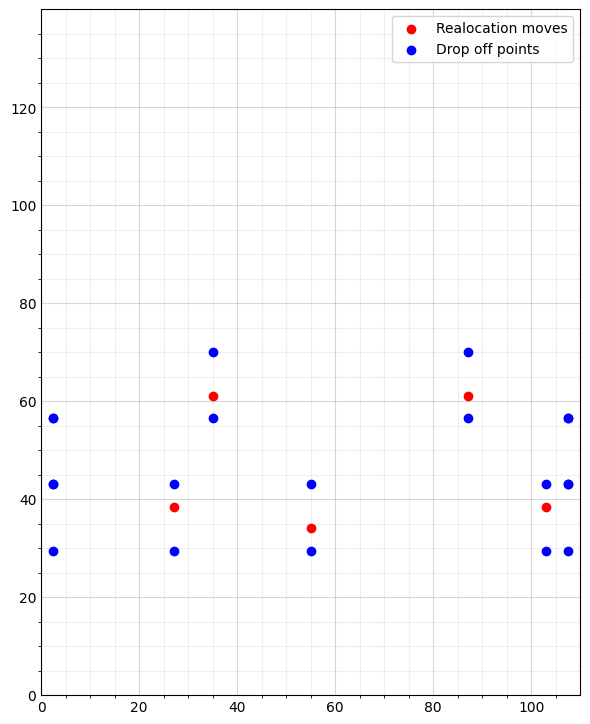

In [4]:
Simulation.plot_map(J,D,[],figsize=(5.5,7))

In [17]:
trips_problem=Solver.trptr_problem(n,m,J,D,Point(0,0),Point(0,0))

Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-29
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 2827 rows, 312 columns and 12122 nonzeros
Model fingerprint: 0xef0847d6
Variable types: 42 continuous, 270 integer (270 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 2e+02]
Presolve removed 5 rows and 5 columns
Presolve time: 0.02s
Presolved: 2822 rows, 307 columns, 12112 nonzeros
Variable types: 42 continuous, 265 integer (265 binary)
Found heuristic solution: objective 190.0304253

Root relaxation: objective 1.303108e+01, 61 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0    

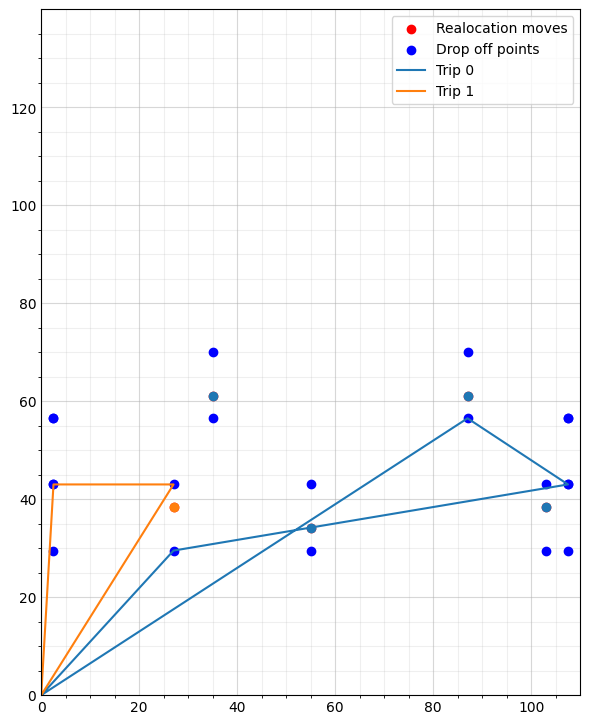

In [18]:
Simulation.plot_map(J,D,trips_problem,figsize=(5.5,7))

In [5]:
trips=Solver.sa_approach(n, m, ks, kr, kn, T_start, c, J, D, Point(0,0), Point(0,0))

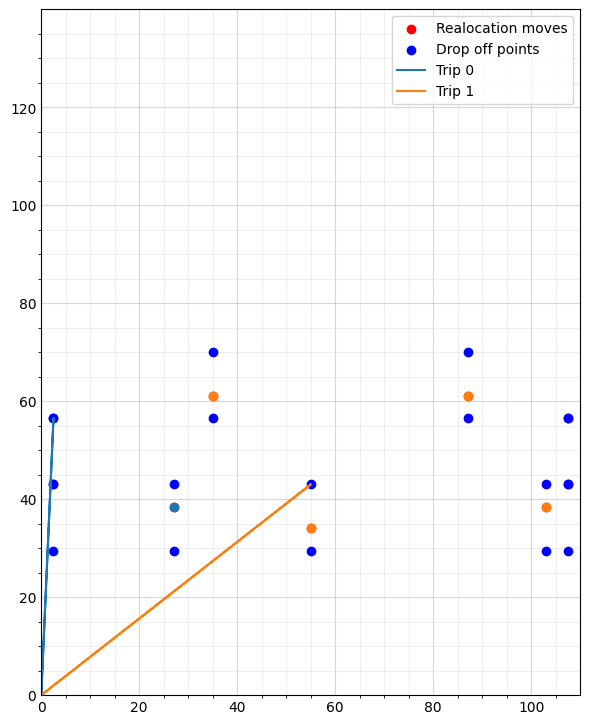

In [6]:
Simulation.plot_map(J,D,trips,figsize=(5.5,7))

In [7]:
new_trips=Solver.sm_matheuristic(J,D,trips)
#new_trips=Solver.sam_matheuristic(n, m, J, D, trips)


Set parameter TimeLimit to value 60
Gurobi Optimizer version 9.5.1 build v9.5.1rc2 (mac64[x86])
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 5 rows, 2 columns and 5 nonzeros
Model fingerprint: 0x97fe9266
Variable types: 0 continuous, 2 integer (2 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [4e+01, 7e+01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 117.2422378
Presolve removed 5 rows and 2 columns
Presolve time: 0.00s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.01 seconds (0.00 work units)
Thread count was 1 (of 8 available processors)

Solution count 1: 117.242 

Optimal solution found (tolerance 1.00e-04)
Best objective 1.172422377669e+02, best bound 1.172422377669e+02, gap 0.0000%


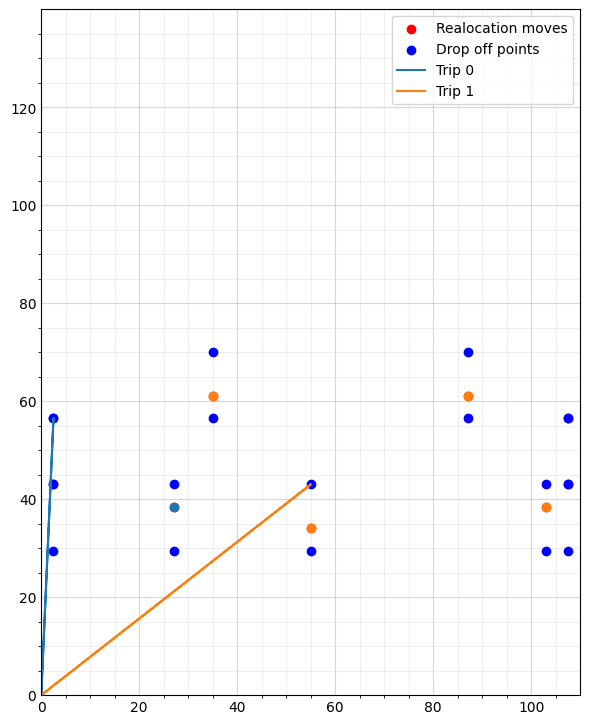

In [8]:
Simulation.plot_map(J,D,new_trips,figsize=(5.5,7))


In [9]:
trips_localsearch=Solver.local_search(n,m,J, D, 100000,new_trips)

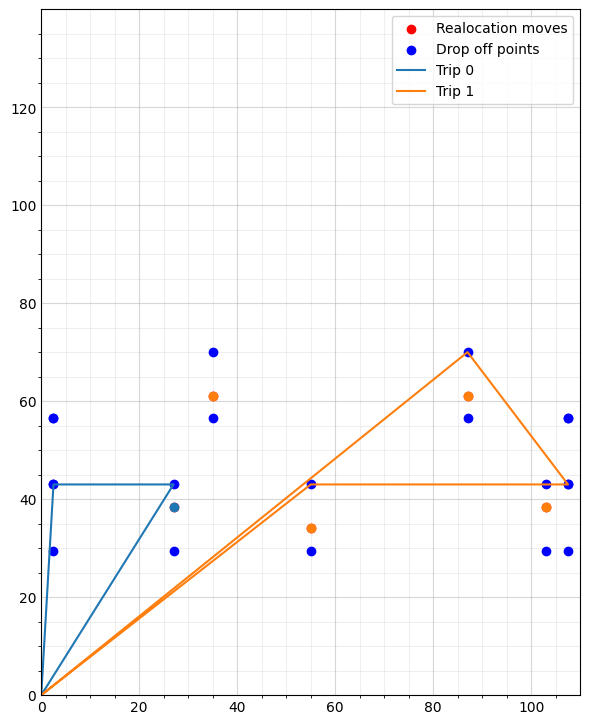

In [11]:
Simulation.plot_map(J,D,trips_localsearch,figsize=(5.5,7))


In [12]:
time_cc=Trips.get_total_duration(trips)
time_sam=Trips.get_total_duration(new_trips)
time_local_search=Trips.get_total_duration(trips_localsearch)
time_problem=Trips.get_total_duration(trips_problem)
print(f"time cc = {time_cc}")
print(f"time sam = {time_sam}")
print(f"time localsearch = {time_local_search}")
print(f'time problem={time_problem}')


time cc = 117.24223776688514
time sam = 117.24223776688514
time localsearch = 87.46223021582733
time problem=79.65467625899281


In [13]:
print(Trips.is_taxi_trips(trips,J,m))
print(Trips.is_taxi_trips(new_trips,J,m))
print(Trips.is_taxi_trips(trips_localsearch,J,m))
print(Trips.is_taxi_trips(trips_problem,J,m))


True
True
True
True


In [19]:
# Saving the objects:
with open('objs2.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([J, D, trips,new_trips,trips_localsearch,trips_problem], f)



In [3]:
# Getting back the objects:
with open('objs2.pkl','rb') as f:  # Python 3: open(..., 'rb')
    J, D, trips,new_trips,trips_localsearch,trips_problem = pickle.load(f)
